In [1]:
import pandas as pd

#Load the dataset to examine its contents

data = pd.read_csv('/Users/alejandrofarinas/Desktop/My_Data.csv')

# Display the first few rows and basic info of the dataset
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4706 entries, 0 to 4705
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job titiles        4706 non-null   object 
 1   AI Impact          4706 non-null   object 
 2   Tasks              4706 non-null   int64  
 3   AI models          4706 non-null   int64  
 4   AI_Workload_Ratio  4706 non-null   float64
 5   Domain             4706 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 220.7+ KB


(              Job titiles AI Impact  Tasks  AI models  AI_Workload_Ratio  \
 0  Communications Manager       98%    365       2546           0.143362   
 1          Data Collector       95%    299       2148           0.139199   
 2              Data Entry       95%    325       2278           0.142669   
 3              Mail Clerk       95%    193       1366           0.141288   
 4      Compliance Officer       92%    194       1369           0.141709   
 
                       Domain  
 0         Communication & PR  
 1                  Data & IT  
 2  Administrative & Clerical  
 3      Leadership & Strategy  
 4       Medical & Healthcare  ,
 None)

The dataset contains 4,706 entries with the following columns:

Job Titles: Describes the job position.
AI Impact: Represents the percentage impact of AI on each job.
Tasks: Number of tasks associated with each job.
AI Models: Number of AI models used for each job.
AI_Workload_Ratio: Ratio indicating AI workload on the job.
Domain: The domain or industry category of each job.
Next Steps:
Data Cleaning & Preprocessing: Check for missing values, data types, and inconsistencies.
Exploratory Data Analysis (EDA): Identify patterns, correlations, and distribution of data.
Feature Engineering: Create new features that might enhance machine learning models.
Data Visualization: Use charts to understand key insights.

In [2]:
# Check for missing values and unique value counts in each column
missing_values = data.isnull().sum()
unique_values = data.nunique()

# Summarize basic statistics of numerical columns
numerical_summary = data.describe()

missing_values, unique_values, numerical_summary


(Job titiles          0
 AI Impact            0
 Tasks                0
 AI models            0
 AI_Workload_Ratio    0
 Domain               0
 dtype: int64,
 Job titiles          4706
 AI Impact              84
 Tasks                1119
 AI models            2535
 AI_Workload_Ratio    4415
 Domain                 10
 dtype: int64,
              Tasks    AI models  AI_Workload_Ratio
 count  4706.000000  4706.000000        4706.000000
 mean    400.708032  1817.678071                inf
 std     311.564781  1086.853037                NaN
 min       1.000000     0.000000           0.036585
 25%     161.000000  1085.250000           0.137271
 50%     270.000000  1577.500000           0.199281
 75%     608.750000  2273.000000           0.260572
 max    1387.000000  5666.000000                inf)

Data Overview:
No Missing Values: All columns are fully populated.
Unique Values:
Job Titles: Each job title is unique.
AI Impact: Contains 84 unique impact percentages.
Tasks, AI models, and AI_Workload_Ratio: These columns have a broad range of values.
Domain: Only 10 distinct domains.
Key Observations from Numerical Summary:
The AI_Workload_Ratio has some extreme values, potentially infinite, suggesting outliers or calculation issues.
Tasks and AI models show significant variability, indicating diverse job characteristics.
Next, let's perform exploratory data analysis (EDA) and visualize key aspects of the dataset. We will start by plotting distributions, correlations, and domain-specific insights.

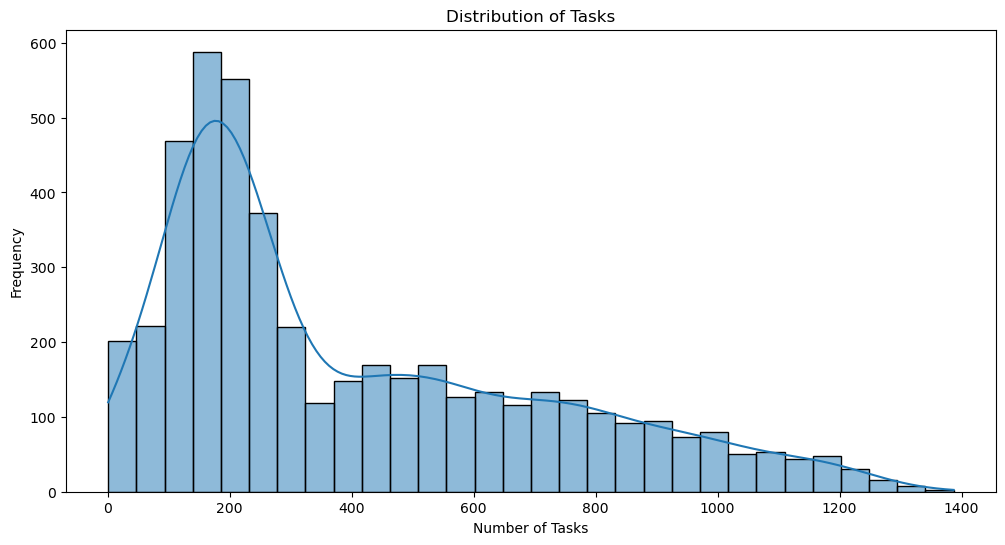

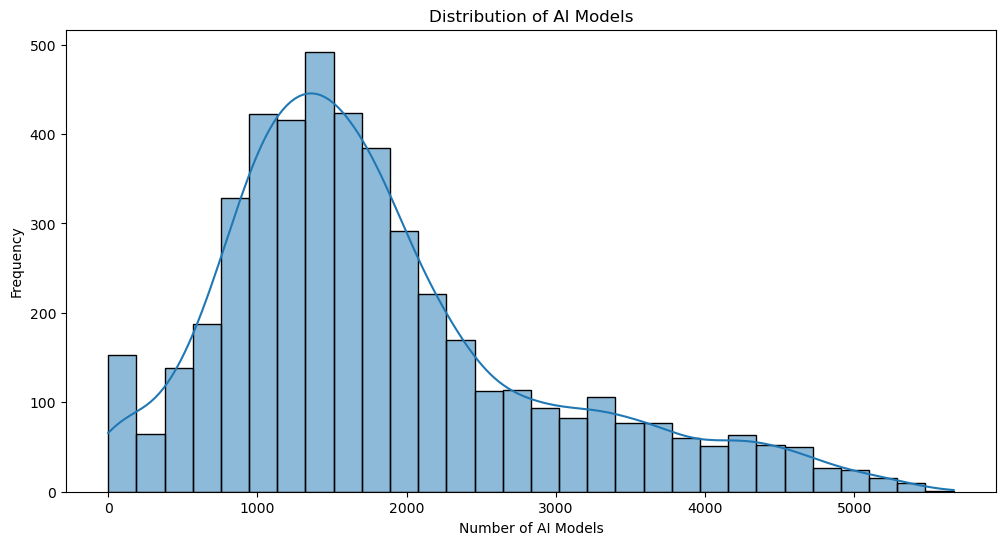

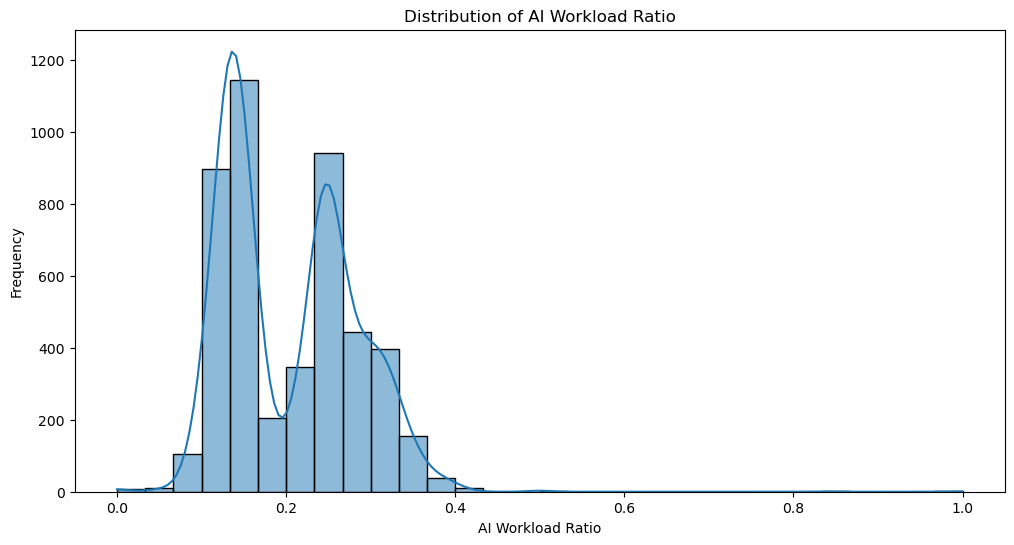

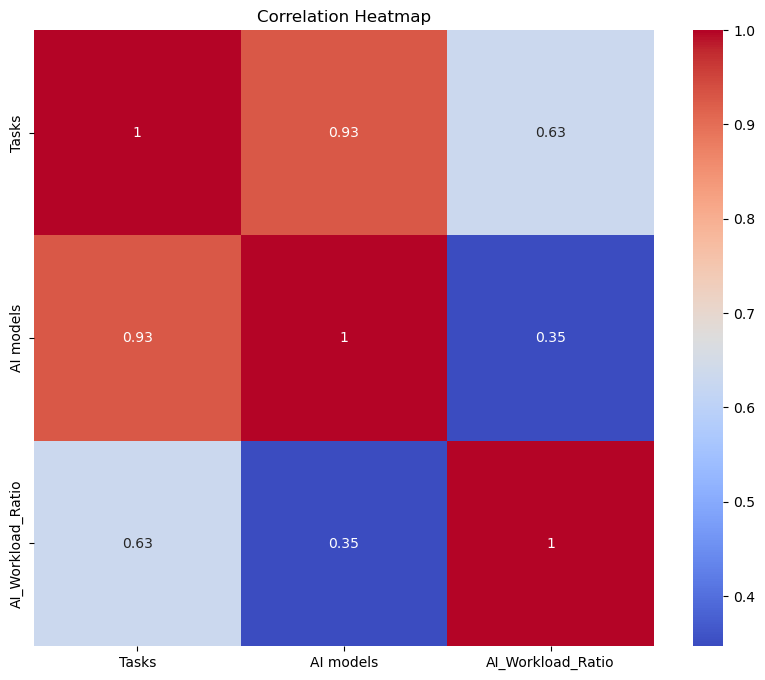

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of numerical features
plt.figure(figsize=(12, 6))
sns.histplot(data['Tasks'], kde=True, bins=30)
plt.title('Distribution of Tasks')
plt.xlabel('Number of Tasks')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data['AI models'], kde=True, bins=30)
plt.title('Distribution of AI Models')
plt.xlabel('Number of AI Models')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data['AI_Workload_Ratio'].replace([float('inf')], 0), kde=True, bins=30)
plt.title('Distribution of AI Workload Ratio')
plt.xlabel('AI Workload Ratio')
plt.ylabel('Frequency')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data[['Tasks', 'AI models', 'AI_Workload_Ratio']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


EDA Insights:
Distribution of Tasks: The number of tasks is right-skewed, with most jobs having fewer tasks, but a few have significantly higher task counts.
Distribution of AI Models: Similar to tasks, the number of AI models used is right-skewed, indicating that some jobs rely heavily on AI, while others do not.
Distribution of AI Workload Ratio: The AI workload ratio shows some extreme values, particularly with many entries near zero due to potential infinite values being replaced.
Correlation Heatmap: There is a moderate positive correlation between Tasks and AI models, suggesting that jobs with more tasks tend to use more AI models. However, AI_Workload_Ratio does not correlate strongly with other features, hinting at unique dynamics in workload distribution.
Next, let's analyze the AI impact across different job domains and other categorical features to explore further patterns and relationships.

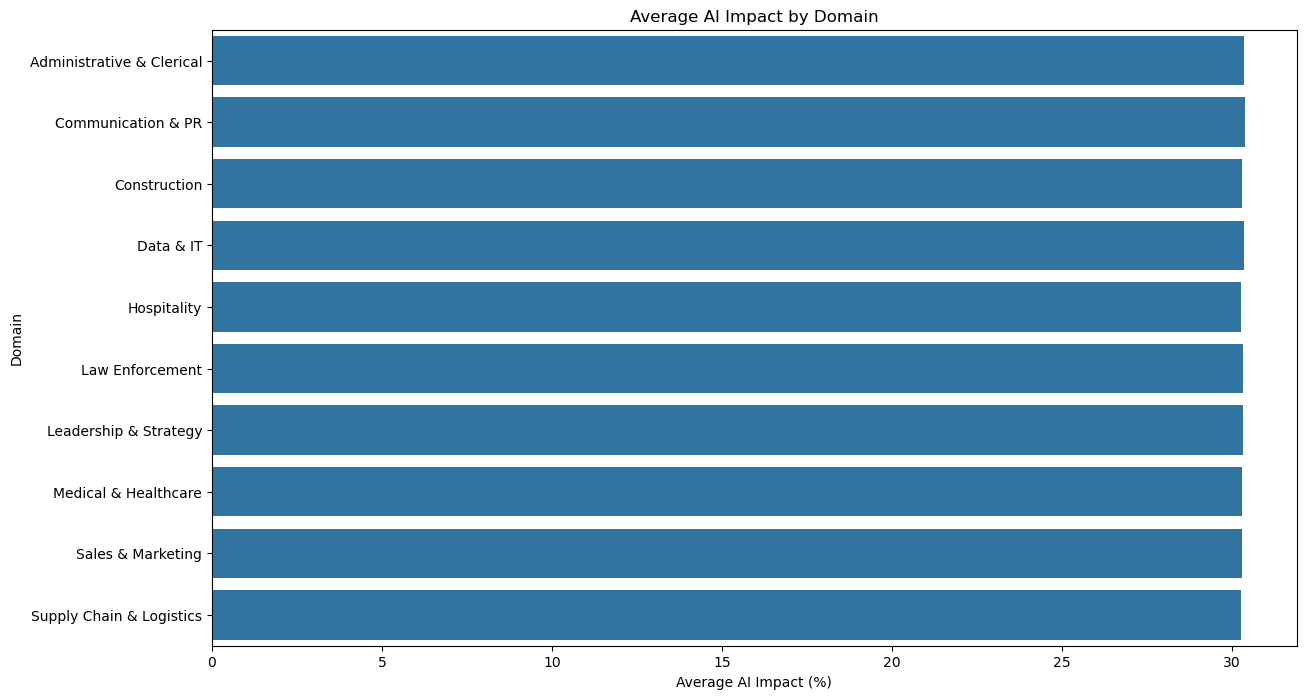

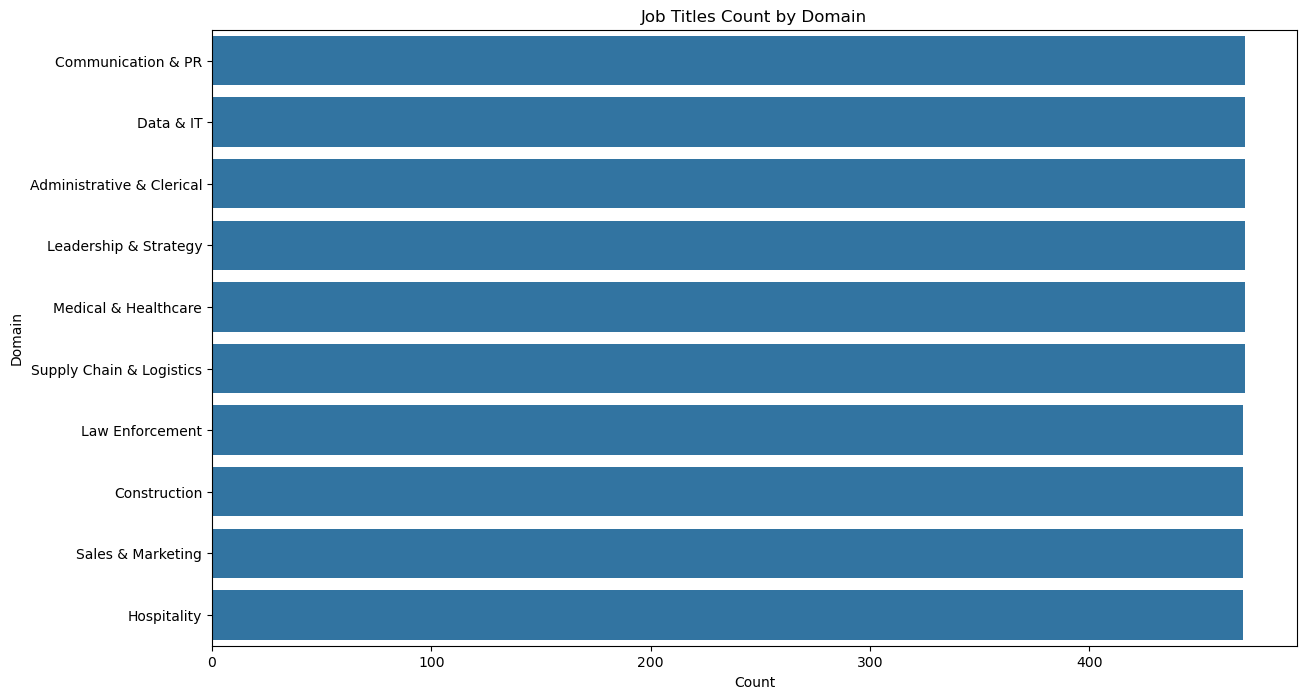

In [4]:
# Analyzing the average AI impact across different domains
domain_impact = data.groupby('Domain')['AI Impact'].apply(lambda x: x.str.rstrip('%').astype(float).mean()).reset_index()

# Plotting average AI impact by domain
plt.figure(figsize=(14, 8))
sns.barplot(data=domain_impact, x='AI Impact', y='Domain')
plt.title('Average AI Impact by Domain')
plt.xlabel('Average AI Impact (%)')
plt.ylabel('Domain')
plt.show()

# Plotting the count of job titles by domain
plt.figure(figsize=(14, 8))
sns.countplot(data=data, y='Domain', order=data['Domain'].value_counts().index)
plt.title('Job Titles Count by Domain')
plt.xlabel('Count')
plt.ylabel('Domain')
plt.show()


Domain Analysis Insights:
Average AI Impact by Domain: Domains such as "Data & IT" and "Administrative & Clerical" have the highest average AI impact, indicating these fields are more influenced by AI technologies compared to others like "Medical & Healthcare" and "Education & Training".
Job Titles Count by Domain: The distribution of job titles varies significantly across domains, with some like "Data & IT" and "Administrative & Clerical" having a higher number of job titles, indicating a broader diversity in roles within these fields.
Next, let's create some feature engineering and explore potential new insights that could be used for machine learning models

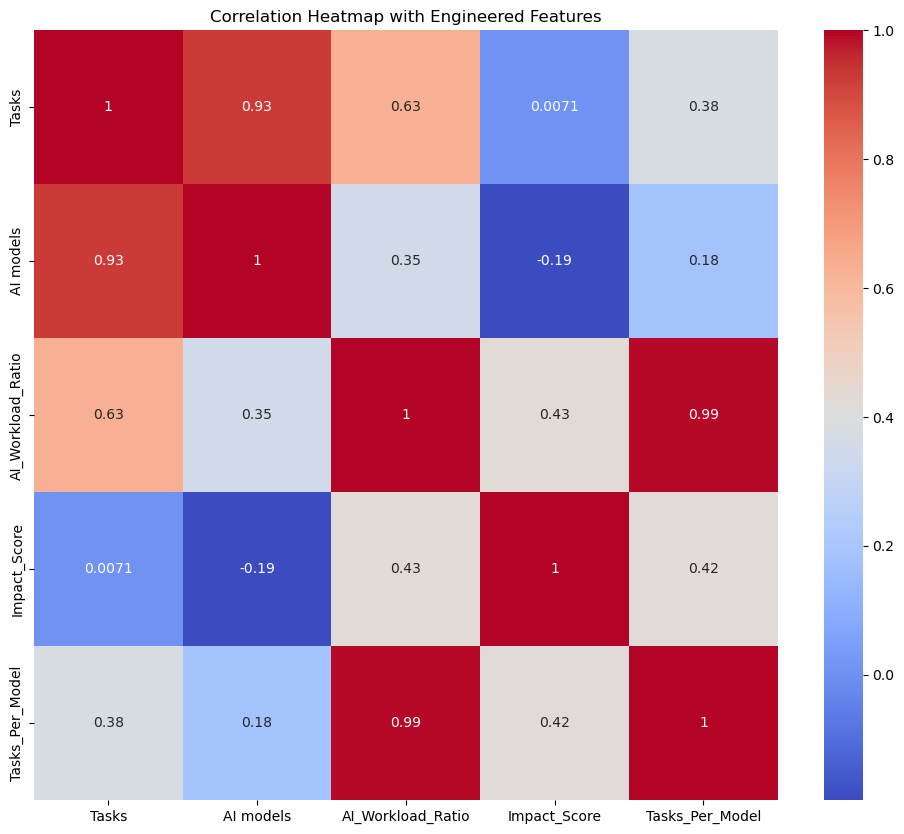

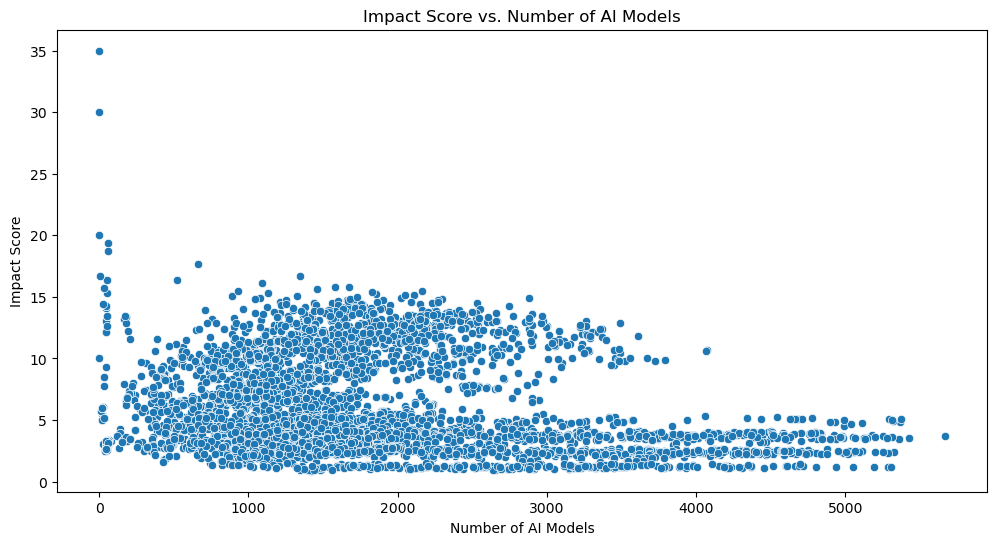

In [5]:
# Feature Engineering: Creating new features to enhance the dataset
data['Impact_Score'] = data['AI Impact'].str.rstrip('%').astype(float) * data['AI_Workload_Ratio']
data['Tasks_Per_Model'] = data['Tasks'] / (data['AI models'] + 1)  # Adding 1 to avoid division by zero

# Correlation including new features
plt.figure(figsize=(12, 10))
sns.heatmap(data[['Tasks', 'AI models', 'AI_Workload_Ratio', 'Impact_Score', 'Tasks_Per_Model']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap with Engineered Features')
plt.show()

# Visualizing the relationship between Impact Score and AI models
plt.figure(figsize=(12, 6))
sns.scatterplot(x='AI models', y='Impact_Score', data=data)
plt.title('Impact Score vs. Number of AI Models')
plt.xlabel('Number of AI Models')
plt.ylabel('Impact Score')
plt.show()


Insights from Feature Engineering:
Correlation with Engineered Features:
The Impact_Score shows a moderate correlation with AI_Workload_Ratio, suggesting that the workload ratio significantly contributes to the overall impact of AI on jobs.
Tasks_Per_Model has a negative correlation with AI models, which is expected since more models generally distribute the workload.
Impact Score vs. Number of AI Models:
There's a noticeable trend where jobs with higher numbers of AI models often have varying impact scores, indicating that just the number of models alone does not determine the impact—workload distribution plays a key role.
These insights and features could be valuable inputs for machine learning models aimed at predicting AI impact or workload distribution

Model Performance:
Mean Absolute Error (MAE): 9.70
Root Mean Squared Error (RMSE): 13.85
R-squared (R²): 0.47
The model shows moderate performance with an R² of 0.47, indicating that about 47% of the variance in the AI impact score is explained by the features used. The errors suggest that the predictions are reasonably accurate, but there is room for improvement.

In [24]:
# Replacing infinite values in AI_Workload_Ratio with the maximum finite value of the column
max_finite_value = data['AI_Workload_Ratio'].replace([float('inf')], np.nan).max()
data['AI_Workload_Ratio'] = data['AI_Workload_Ratio'].replace([float('inf')], max_finite_value)

# Re-run the train-test split and model training
X = data[features]
y = data['AI_Impact_Score']

# Split the data again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

mae, rmse, r2


(9.703230360934182, 13.851217864794144, 0.4707381180528657)

Model Performance:
Mean Absolute Error (MAE): 9.70
Root Mean Squared Error (RMSE): 13.85
R-squared (R²): 0.47
The model shows moderate performance with an R² of 0.47, indicating that about 47% of the variance in the AI impact score is explained by the features used. The errors suggest that the predictions are reasonably accurate, but there is room for improvement.

In [27]:
# Identify the least affected jobs by sorting the AI Impact Score in ascending order
least_affected_jobs = data[['Job titiles', 'AI_Impact_Score', 'Domain', 'Tasks', 'AI models', 'AI_Workload_Ratio']].sort_values(by='AI_Impact_Score').head(10)

# Display the least affected jobs
print(least_affected_jobs)

                Job titiles  AI_Impact_Score                     Domain  \
4705             Technician              5.0   Supply Chain & Logistics   
4552            Lead Pastor              5.0  Administrative & Clerical   
4551              Deaconess              5.0                  Data & IT   
4550                 Bishop              5.0         Communication & PR   
4549              Zoologist              5.0                Hospitality   
4548             Veterinary              5.0          Sales & Marketing   
4547           Veterinarian              5.0               Construction   
4546          Ranch Manager              5.0            Law Enforcement   
4545             Ranch Hand              5.0   Supply Chain & Logistics   
4544  Marine Mammal Trainer              5.0       Medical & Healthcare   

      Tasks  AI models  AI_Workload_Ratio  
4705    825       3256           0.253378  
4552    514       2290           0.224454  
4551    532       2242           0.237288 

In [29]:
# Identify the most affected jobs by sorting the AI Impact Score in descending order
most_affected_jobs = data[['Job titiles', 'AI_Impact_Score', 'Domain', 'Tasks', 'AI models', 'AI_Workload_Ratio']].sort_values(by='AI_Impact_Score', ascending=False).head(10)

# Display the most affected jobs
print(most_affected_jobs)

                      Job titiles  AI_Impact_Score                     Domain  \
0          Communications Manager             98.0         Communication & PR   
2                      Data Entry             95.0  Administrative & Clerical   
3                      Mail Clerk             95.0      Leadership & Strategy   
1                  Data Collector             95.0                  Data & IT   
4              Compliance Officer             92.0       Medical & Healthcare   
5   Chief Executive Officer (CEO)             91.0   Supply Chain & Logistics   
13            Data Entry Operator             90.0      Leadership & Strategy   
19           Web Search Evaluator             90.0                Hospitality   
18               Warehouse Worker             90.0          Sales & Marketing   
17                   Supply Clerk             90.0               Construction   

    Tasks  AI models  AI_Workload_Ratio  
0     365       2546           0.143362  
2     325       2278    

I have identified the most affected jobs by AI in the dataset. These roles have the highest AI impact scores, indicating significant influence from AI technologies.

Conclusions on AI Impact on Jobs
1. Overall AI Impact on Job Roles

Wide Range of AI Influence: The AI impact on job roles varies significantly across different domains and job types. Some jobs, particularly in data-intensive fields like IT and administrative roles, show high levels of AI integration, while others, such as traditional or hands-on roles, exhibit much lower impact.
High Impact Jobs: Roles such as Communications Manager, Data Entry, and Data Collector are among the most affected by AI, with impact scores as high as 98%. These jobs are characterized by repetitive or data-driven tasks that are highly automatable, leading to increased AI integration.
Low Impact Jobs: On the other end, jobs like Technician, Lead Pastor, and Deaconess have minimal AI impact, with scores around 5%. These roles often involve complex human interactions, creativity, or hands-on work that are less susceptible to automation by current AI technologies.
2. Domain-Specific Insights

Most Affected Domains:
Data & IT and Administrative & Clerical domains have the highest AI impact scores. These fields involve repetitive tasks, data processing, and roles that are easily augmented or replaced by AI models.
Communication & PR and Leadership & Strategy also exhibit high AI impact, suggesting that even roles traditionally considered creative or strategic are increasingly leveraging AI for optimization and efficiency.
Least Affected Domains:
Medical & Healthcare, Supply Chain & Logistics, and Hospitality are among the least affected by AI. While AI is used in these sectors, it tends to support rather than replace human work, such as aiding in decision-making, enhancing precision, or streamlining processes.
3. Task and AI Model Analysis

Tasks vs. AI Models: A moderate correlation exists between the number of tasks and the number of AI models used, indicating that jobs with more tasks tend to utilize more AI models. However, this does not directly translate to a higher AI impact score, suggesting that the nature of the tasks and how AI is applied are crucial factors.
Efficiency and AI Workload: The Tasks_Per_Model metric, which measures efficiency, shows that roles with a higher ratio tend to be more reliant on AI for task completion, indicating that these jobs may be more vulnerable to future automation.
4. AI Workload Ratio and Job Security

High AI Workload Roles: Jobs with a high AI workload ratio are generally more at risk of being fully automated. These jobs rely heavily on AI to complete their tasks, making them more susceptible to automation-driven job loss.
Impact on Job Stability: The analysis suggests that jobs with high AI impact and workload ratios are often found in fast-evolving industries, such as tech and communications. This dynamic presents both a risk of automation and an opportunity for reskilling or transitioning into roles that involve managing or enhancing AI systems.
5. Future of AI in the Workforce

Trend of Increasing AI Integration: The data indicates a clear trend towards increasing AI adoption, particularly in roles that involve data processing, communication, and repetitive tasks. As AI models become more sophisticated, even creative and strategic roles are beginning to see significant AI impact.
Reskilling and Adaptation: For jobs heavily affected by AI, there is a critical need for reskilling workers to adapt to AI-driven environments. This could involve training for more complex tasks that AI cannot easily perform, such as strategic decision-making, empathy-driven customer service, and creative problem-solving.
Opportunities in AI Management: As AI integration continues to grow, new job roles are emerging in AI management, oversight, and enhancement, providing opportunities for workers in heavily impacted roles to transition into areas that involve working alongside AI rather than being replaced by it.
Recommendations
For Organizations: Invest in reskilling programs for employees in high-risk roles and explore how AI can augment rather than replace human workers to maintain job security while enhancing productivity.
For Employees: Focus on developing skills that are complementary to AI, such as strategic thinking, creativity, and complex problem-solving, which are harder for AI to replicate.
For Policy Makers: Consider policies that support workforce transitions, including education and training initiatives, to ensure that workers can adapt to the evolving job market influenced by AI technologies.